In [127]:
import os
import glob

path_train_xml=r'C:\Users\atefe\Desktop\b_d\train_xml'
path_train=r'C:\Users\atefe\Desktop\b_d\train'
path_test=r'C:\Users\atefe\Desktop\b_d\test'

def list_file_name(path: str):

    file_name=[]
    p=os.listdir(path)
    
    for i in range(len(p)):
        file_name.append(p[i])
    return file_name    

In [128]:
pathtrain_xml=r'C:\Users\atefe\Desktop\b_d\train_xml\*.xml'
pathtrain=r'C:\Users\atefe\Desktop\b_d\train\*.tif'
pathtest=r'C:\Users\atefe\Desktop\b_d\test\*.tif'

def list_path(pathtrain_xml,pathtrain,pathtest):
    list_xml=glob.glob(pathtrain_xml)
    list_train=glob.glob(pathtrain)
    list_test=glob.glob(pathtest)
    return(list_xml,list_train,list_test)
        

In [129]:
xml=list_file_name(path_train_xml)

test=list_file_name(path_test)

In [130]:
test

['0148e4778e6d8b22a8980bf4fc89351b_12.tif',
 '0148e4778e6d8b22a8980bf4fc89351b_25.tif',
 '0148e4778e6d8b22a8980bf4fc89351b_30.tif',
 '0148e4778e6d8b22a8980bf4fc89351b_37.tif',
 '0171cd73c7bdbf48ccfd0c21804f9ced_1.tif',
 '02148af935993f360f2d9c3ca3eb782a_10.tif',
 '02148af935993f360f2d9c3ca3eb782a_8.tif',
 '02701be3fc048a3b7e2ce7a4b2a05aad.tif',
 '0370ca51b827c0f72a8f6b6a83e4411a.tif',
 '051781786f9fb429f4cc6508ac8e0676_3.tif',
 '0533a1e934bd69947b247d0e858d854f_4.tif',
 '0533a1e934bd69947b247d0e858d854f_5.tif',
 '05dbb8801643d58f9aa7c1d1de0ea6c2.tif',
 '081a5d93952b57ecde40bc02b8b70e67_2.tif',
 '083333af6122d35b285b062d52144332.tif',
 '093e2707ae252960934357cbf04569c3.tif',
 '0a618bf88fda631953bf0707455e8178.tif',
 '0a948131fe85c38152c0b9b22f7c09fc_1.tif',
 '0c45e17531f95abb9a4eccc2a8caa7ad.tif',
 '0d26d1e0574f8c36cf6091d04e84dfdb.tif',
 '0d338061a285cb5d573481a4662f401a.tif',
 '0f5bb627fa045d97551937ab506e8ab0_1.tif',
 '0f6bc860c0dbac06933e2dbae943b850_2.tif',
 '0f6bc860c0dbac06933e2d

In [131]:
list_xml,list_train,list_test=list_path(pathtrain_xml,pathtrain,pathtest)

In [132]:
list_xml[1000]

'C:\\Users\\atefe\\Desktop\\b_d\\train_xml\\f3d058f08f7612b07520701b5c7ec7e5_2.xml'

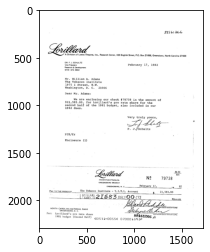

In [133]:
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image

#image=Image.open(rf'{list_train[1]}')
image=Image.open(list_train[2])
plt.imshow(image)



In [134]:
image=cv.imread(list_train[2])
cv.imwrite(r'C:\Users\atefe\Desktop\b_d\formodel\sign\test.tif', image)

True

In [135]:
with open(list_xml[2]) as annotated_file:
    print(''.join(annotated_file.readlines()))


<?xml version="1.0" encoding="UTF-8"?>
<!--GEDI is developed at Language and Media Processing Laboratory, University of Maryland.-->
<GEDI xmlns="http://lamp.cfar.umd.edu/GEDI" version="1.0">
	<DL_DOCUMENT src="dgi64c00.tif" NrOfPages="1" docTag="xml">
		<DL_PAGE gedi_type="DL_PAGE" src="dgi64c00.tif" pageID="1" width="1728" height="2292">
			<DL_ZONE gedi_type="DLSignature" id="None" col="933" row="1139" width="396" height="109" Overlapped="Yes" AuthorID="Schultz, F.J."> </DL_ZONE>
			<DL_ZONE gedi_type="DLSignature" id="None" col="902" row="1986" width="430" height="84" Overlapped="Yes" AuthorID=""> </DL_ZONE>
			<DL_ZONE gedi_type="DLSignature" id="None" col="936" row="2067" width="451" height="73" Overlapped="Yes" AuthorID=""> </DL_ZONE>
			<DL_ZONE gedi_type="DLLogo" id="None" col="93" row="340" width="455" height="146"> </DL_ZONE>
		</DL_PAGE>
	</DL_DOCUMENT>
</GEDI>


In [136]:
import xml.etree.ElementTree as ET

def xml_parser(xml_file):

    tree = ET.parse(xml_file)
    root = tree.getroot() 

    mytree=ET.parse(xml_file)
    myroot=mytree.getroot()

    DL_DOCUMENT=root.find('{http://lamp.cfar.umd.edu/GEDI}DL_DOCUMENT')
    DL_PAGE=DL_DOCUMENT.find('{http://lamp.cfar.umd.edu/GEDI}DL_PAGE')

    list_data=[]

    for DL_ZONE in DL_PAGE:
        dic=DL_ZONE.attrib
        list_data.append(dic)

    bounding_box=[]


    for i in range(len(list_data)):
        if list_data[i]['gedi_type']=='DLSignature':
            ymin=int(list_data[i]['row'])
            ymax=int(list_data[i]['row'])+int(list_data[i]['height'])
            height=int(list_data[i]['height'])
            xmin=int(list_data[i]['col'])
            xmax=int(list_data[i]['col'])+int(list_data[i]['width'])
            width=int(list_data[i]['width'])
            bounding_box.append([xmin,ymin,xmax,ymax])
            #bounding_box.append([xmin, ymax, width, height])


        else:
            pass
    signatured=[]
    if len(bounding_box)!=0:
        signatured.append(1)
    else:
        signatured.append(0)

    return( bounding_box , signatured)

In [137]:
bounding_box , signatured=xml_parser(list_xml[1])


In [138]:
bounding_box

[]

In [139]:
signatured

[0]

In [140]:
import pandas as pd
bbx=[]
ss=[]
Id=[]
d={}
for i in range(len(list_xml)):


    bounding_box , signatured=xml_parser(list_xml[i])
    name_file=list_file_name(path_train_xml)[i][:-4]
    Id.append(name_file)
    bbx.append(bounding_box)
    ss.append(signatured[0])
    d[name_file]=signatured[0]

df=pd.DataFrame(list(d.items()),columns=['Id','Expected'])
df.to_csv('train_class.csv', index=False)


        
        

In [141]:
ds_sig=list(df.Id[df['Expected']==1])
ds_unsig=list(df.Id[df['Expected']==0])


In [142]:
sign_to_move=[]
sign_to_move_t=[]

for files in ds_sig:
    file=files+'.jpg'
    file2=files+'.tif'
    sign_to_move.append(file)
    sign_to_move_t.append(file2)


In [143]:
unsig_to_move=[]
unsig_to_move_t=[]
for files in ds_unsig:
    file=files+'.jpg'
    file2=files+'.tif'
    unsig_to_move.append(file) 
    unsig_to_move_t.append(file2)


In [144]:
pathtrain_xml=r'C:\Users\atefe\Desktop\b_d\train_xml'
pathtrain=r'C:\Users\atefe\Desktop\b_d\train'
pathtest=r'C:\Users\atefe\Desktop\b_d\test'

def list_path(pathtrain_xml,pathtrain,pathtest):
    list_xml=glob.glob(pathtrain_xml)
    list_train=glob.glob(pathtrain)
    list_test=glob.glob(pathtest)
    return(list_xml,list_train,list_test)
        

In [145]:
import shutil

In [146]:
r'''source_folder = r"C:\Users\atefe\Desktop\b_d\train"
destination_folder = r"C:\Users\atefe\Desktop\b_d\formodel\sign"
files_to_move=sign_to_move
file_to_move_t=sign_to_move_t
for i in files_to_move:
    j=i[:-4]
    path=rf'{source_folder}\{j}.tif'
    path2=rf'{destination_folder}\{i}'
    image=cv.imread(path)
    cv.imwrite(path2,image)
    '''

'source_folder = r"C:\\Users\\atefe\\Desktop\\b_d\\train"\ndestination_folder = r"C:\\Users\\atefe\\Desktop\\b_d\\formodel\\sign"\nfiles_to_move=sign_to_move\nfile_to_move_t=sign_to_move_t\nfor i in files_to_move:\n    j=i[:-4]\n    path=rf\'{source_folder}\\{j}.tif\'\n    path2=rf\'{destination_folder}\\{i}\'\n    image=cv.imread(path)\n    cv.imwrite(path2,image)\n    '

In [147]:
r'''source_folder = r"C:\Users\atefe\Desktop\b_d\train\"
destination_folder_unsign = r"C:\Users\atefe\Desktop\b_d\formodel\unsign"
files_to_move_unsign = unsig_to_move
for i in files_to_move_unsign:
    j=i[:-4]
    path=rf'{source_folder}\{j}.tif'
    path2=rf'{destination_folder_unsign}\{i}'
    image=cv.imread(path)
    cv.imwrite(path2,image)'''

'source_folder = r"C:\\Users\\atefe\\Desktop\\b_d\\train\\"\ndestination_folder_unsign = r"C:\\Users\\atefe\\Desktop\\b_d\\formodel\\unsign"\nfiles_to_move_unsign = unsig_to_move\nfor i in files_to_move_unsign:\n    j=i[:-4]\n    path=rf\'{source_folder}\\{j}.tif\'\n    path2=rf\'{destination_folder_unsign}\\{i}\'\n    image=cv.imread(path)\n    cv.imwrite(path2,image)'

In [148]:
r'''source_folder = r"C:\Users\atefe\Desktop\b_d\test"
destination_folder_test = r"C:\Users\atefe\Desktop\b_d\test_jpg"
files_to_test=test
for i in files_to_test:
    j=i[:-4]
    path=rf'{source_folder}\{i}'
    path2=rf'{destination_folder_test}\{j}.jpg'
    image=cv.imread(path)
    cv.imwrite(path2,image)'''

'source_folder = r"C:\\Users\\atefe\\Desktop\\b_d\\test"\ndestination_folder_test = r"C:\\Users\\atefe\\Desktop\\b_d\\test_jpg"\nfiles_to_test=test\nfor i in files_to_test:\n    j=i[:-4]\n    path=rf\'{source_folder}\\{i}\'\n    path2=rf\'{destination_folder_test}\\{j}.jpg\'\n    image=cv.imread(path)\n    cv.imwrite(path2,image)'

In [149]:
# create model
import tensorflow as tf
import scipy
import os

In [150]:
dataset_folder=r'C:\Users\atefe\Desktop\b_d\formodel\model_jpg'
train_dir = os.path.join(dataset_folder, 'train')
validation_dir = os.path.join(dataset_folder, 'validation')
train_sig_dir = os.path.join(train_dir, 'signatured')

# Directory with our training dog pictures
train_unsig_dir = os.path.join(train_dir, 'unsignatured')

# Directory with our validation cat pictures
validation_sig_dir = os.path.join(validation_dir, 'signatured')

# Directory with our validation dog pictures
validation_unsig_dir = os.path.join(validation_dir, 'unsignatured')



In [187]:
train_generator = tf.keras.utils.image_dataset_from_directory(
                    directory = train_dir,
                    #image_size = (128,128),
                    image_size = (256,256),
                    color_mode = 'grayscale',                    
                    batch_size = 32,
                    shuffle = True,
                    seed = 42
                    )

Found 831 files belonging to 2 classes.


In [188]:
validation_generator = tf.keras.utils.image_dataset_from_directory(
                    directory = validation_dir,
                    #image_size = (128,128),
                    image_size = (256,256),                    
                    color_mode = 'grayscale',
                    batch_size = 32,
                    shuffle = True,
                    seed = 42
                    )

Found 208 files belonging to 2 classes.


In [189]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_generator.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = validation_generator.cache().prefetch(buffer_size=AUTOTUNE)

# create a model

In [190]:
from tensorflow.keras import layers, models
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [191]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=50, batch_size=32)

Epoch 1/50
26/26 [==============================] - 42s 2s/step - loss: 0.9312 - accuracy: 0.5620 - val_loss: 0.6310 - val_accuracy: 0.6298
Epoch 2/50
26/26 [==============================] - 30s 1s/step - loss: 0.5481 - accuracy: 0.7088 - val_loss: 0.5957 - val_accuracy: 0.7115
Epoch 3/50
26/26 [==============================] - 29s 1s/step - loss: 0.4445 - accuracy: 0.8026 - val_loss: 0.5649 - val_accuracy: 0.7356
Epoch 4/50
26/26 [==============================] - 29s 1s/step - loss: 0.3770 - accuracy: 0.8448 - val_loss: 0.5752 - val_accuracy: 0.7644
Epoch 5/50
26/26 [==============================] - 29s 1s/step - loss: 0.3003 - accuracy: 0.8785 - val_loss: 0.7173 - val_accuracy: 0.7212
Epoch 6/50
26/26 [==============================] - 28s 1s/step - loss: 0.2532 - accuracy: 0.8929 - val_loss: 0.6469 - val_accuracy: 0.7500
Epoch 7/50
26/26 [==============================] - 28s 1s/step - loss: 0.2355 - accuracy: 0.9122 - val_loss: 0.7786 - val_accuracy: 0.6587
Epoch 8/50
26/26 [==

In [ ]:
model.summary()

In [159]:
### test

In [160]:
pathtest = r'C:\Users\atefe\Desktop\b_d\test_jpg\*.jpg'
#pathtest=r'C:\Users\atefe\Desktop\b_d\test\*.tif'

def list_path(pathtrain_xml,pathtrain,pathtest):
    list_xml=glob.glob(pathtrain_xml)
    list_train=glob.glob(pathtrain)
    list_test=glob.glob(pathtest)
    return(list_xml,list_train,list_test)

In [161]:
test_images=glob.glob(pathtest)

In [ ]:
patht

In [162]:
test_images

['C:\\Users\\atefe\\Desktop\\b_d\\test_jpg\\0148e4778e6d8b22a8980bf4fc89351b_12.jpg',
 'C:\\Users\\atefe\\Desktop\\b_d\\test_jpg\\0148e4778e6d8b22a8980bf4fc89351b_25.jpg',
 'C:\\Users\\atefe\\Desktop\\b_d\\test_jpg\\0148e4778e6d8b22a8980bf4fc89351b_30.jpg',
 'C:\\Users\\atefe\\Desktop\\b_d\\test_jpg\\0148e4778e6d8b22a8980bf4fc89351b_37.jpg',
 'C:\\Users\\atefe\\Desktop\\b_d\\test_jpg\\0171cd73c7bdbf48ccfd0c21804f9ced_1.jpg',
 'C:\\Users\\atefe\\Desktop\\b_d\\test_jpg\\02148af935993f360f2d9c3ca3eb782a_10.jpg',
 'C:\\Users\\atefe\\Desktop\\b_d\\test_jpg\\02148af935993f360f2d9c3ca3eb782a_8.jpg',
 'C:\\Users\\atefe\\Desktop\\b_d\\test_jpg\\02701be3fc048a3b7e2ce7a4b2a05aad.jpg',
 'C:\\Users\\atefe\\Desktop\\b_d\\test_jpg\\0370ca51b827c0f72a8f6b6a83e4411a.jpg',
 'C:\\Users\\atefe\\Desktop\\b_d\\test_jpg\\051781786f9fb429f4cc6508ac8e0676_3.jpg',
 'C:\\Users\\atefe\\Desktop\\b_d\\test_jpg\\0533a1e934bd69947b247d0e858d854f_4.jpg',
 'C:\\Users\\atefe\\Desktop\\b_d\\test_jpg\\0533a1e934bd69947b24

In [175]:
prediction=[]
score=[]
for images in test_images:
    img = tf.keras.utils.load_img(images, target_size=(128, 128))
    im = tf.image.rgb_to_grayscale(img)
    img_array = tf.keras.utils.img_to_array(im)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    
    score = tf.nn.softmax(predictions[0])
    prediction.append( predictions[0])
signatured_test=[]
for predict in prediction:
    if predict[0]>predict[1]:
        signatured_test.append(1)
    if predict[0]<predict[1]:
        signatured_test.append(0)
             

In [186]:
d_t={}
Id_test=[]
for i in range(len(test_images)):
    name_file_test=list_file_name(patht)[i][:-4]
    Id_test.append(name_file_test)
    d_t[name_file_test]=signatured_test[i]
df_test=pd.DataFrame(list(d_t.items()),columns=['Id','Expected'])
df_test.to_csv('challange1.csv', index=False)

In [177]:
df_test

,Id,Expected
0,0148e4778e6d8b22a8980bf4fc89351b_12,0
1,0148e4778e6d8b22a8980bf4fc89351b_25,1
2,0148e4778e6d8b22a8980bf4fc89351b_30,1
3,0148e4778e6d8b22a8980bf4fc89351b_37,1
4,0171cd73c7bdbf48ccfd0c21804f9ced_1,0
...,...,...
246,f7744d49d65d3c116b4b343974be2f2a,0
247,f8f36df9b645fa97e0f0ea027195ffc2,0
248,f95151d46ab46fe856074feb728f4190,0
249,fd40cbeac18b5764fbd2f8d1d52e5640,0


In [178]:
s=df_test[df_test['Expected']==1]

In [179]:
s

,Id,Expected
1,0148e4778e6d8b22a8980bf4fc89351b_25,1
2,0148e4778e6d8b22a8980bf4fc89351b_30,1
3,0148e4778e6d8b22a8980bf4fc89351b_37,1
5,02148af935993f360f2d9c3ca3eb782a_10,1
6,02148af935993f360f2d9c3ca3eb782a_8,1
...,...,...
231,ec11520897b3697b7a99af00d64144f0_6,1
237,f12b9a1d92be06ce9357ae9a12a66e52_1,1
239,f17681f73a22293d830e7c2a9e0ab10d_2,1
245,f6690637ad8d45c5a712cb3afb86b54c_3,1


In [181]:
prediction

[array([ 7.6121154, -7.558973 ], dtype=float32),
 array([-4.4470453,  2.5340347], dtype=float32),
 array([-6.1758122,  4.4740314], dtype=float32),
 array([-3.591727 ,  2.4225805], dtype=float32),
 array([ 1.9158351 , -0.96112317], dtype=float32),
 array([-1.7589828,  1.5615041], dtype=float32),
 array([-7.6079063,  6.9184046], dtype=float32),
 array([ 7.320576, -7.523239], dtype=float32),
 array([ 12.467445, -11.570447], dtype=float32),
 array([ 11.450733 , -11.1225395], dtype=float32),
 array([-10.938623,  13.48919 ], dtype=float32),
 array([-12.2183485,  13.192939 ], dtype=float32),
 array([ 12.427529, -11.113602], dtype=float32),
 array([ 6.5969667, -5.6791563], dtype=float32),
 array([ 8.633754, -8.441506], dtype=float32),
 array([-1.1975694,  1.1701477], dtype=float32),
 array([10.1966095, -9.935569 ], dtype=float32),
 array([-0.80271596,  0.8760193 ], dtype=float32),
 array([ 8.719158, -8.896927], dtype=float32),
 array([ 6.338259 , -7.0793915], dtype=float32),
 array([ 11.473235

In [182]:
patht = r'C:\Users\atefe\Desktop\b_d\test_jpg'
test_file_nama=list_file_name(patht)

In [183]:
test_file_nama

['0148e4778e6d8b22a8980bf4fc89351b_12.jpg',
 '0148e4778e6d8b22a8980bf4fc89351b_25.jpg',
 '0148e4778e6d8b22a8980bf4fc89351b_30.jpg',
 '0148e4778e6d8b22a8980bf4fc89351b_37.jpg',
 '0171cd73c7bdbf48ccfd0c21804f9ced_1.jpg',
 '02148af935993f360f2d9c3ca3eb782a_10.jpg',
 '02148af935993f360f2d9c3ca3eb782a_8.jpg',
 '02701be3fc048a3b7e2ce7a4b2a05aad.jpg',
 '0370ca51b827c0f72a8f6b6a83e4411a.jpg',
 '051781786f9fb429f4cc6508ac8e0676_3.jpg',
 '0533a1e934bd69947b247d0e858d854f_4.jpg',
 '0533a1e934bd69947b247d0e858d854f_5.jpg',
 '05dbb8801643d58f9aa7c1d1de0ea6c2.jpg',
 '081a5d93952b57ecde40bc02b8b70e67_2.jpg',
 '083333af6122d35b285b062d52144332.jpg',
 '093e2707ae252960934357cbf04569c3.jpg',
 '0a618bf88fda631953bf0707455e8178.jpg',
 '0a948131fe85c38152c0b9b22f7c09fc_1.jpg',
 '0c45e17531f95abb9a4eccc2a8caa7ad.jpg',
 '0d26d1e0574f8c36cf6091d04e84dfdb.jpg',
 '0d338061a285cb5d573481a4662f401a.jpg',
 '0f5bb627fa045d97551937ab506e8ab0_1.jpg',
 '0f6bc860c0dbac06933e2dbae943b850_2.jpg',
 '0f6bc860c0dbac06933e2d

In [184]:
signatured_test=[]
for predict in prediction:
    if predict[0]>predict[1]:
        signatured_test.append(1)
    if predict[0]<predict[1]:
        signatured_test.append(0)
        

In [170]:
import pandas as pd

signatured_test=[]
Id=[]
d={}
for i in range(len(test_images)):
    img = tf.keras.utils.load_img(images, target_size=(128, 128))
    im = tf.image.rgb_to_grayscale(img)
    img_array = tf.keras.utils.img_to_array(im)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    
    score = tf.nn.softmax(predictions[0])
    #if predictions[0]>predictions[1]:
        #signatured_test.append(1)
    #if predictions[0]<predictions[1]:
        #signatured_test.append(0)
    
print(predictions[1])

   # name_file=list_file_name(patht)[i][:-4]
    #Id.append(name_file)
    #ss.append(signatured[0])
    #d[name_file]=signatured[0]

#dtest=pd.DataFrame(list(d.items()),columns=['Id','Expected'])
#dtest.to_csv('train_class.csv', index=False)


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
img = tf.keras.utils.load_img(image_test, target_size=(128, 128))

In [ ]:
im = tf.image.rgb_to_grayscale(img)

In [84]:
im.shape

TensorShape([128, 128, 1])

In [85]:
img_array = tf.keras.utils.img_to_array(im)
img_array = tf.expand_dims(img_array, 0)

In [86]:
img_array.shape

TensorShape([1, 128, 128, 1])

In [87]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([9.9999988e-01, 8.3161225e-08], dtype=float32)>

array([[ 7.199458, -9.103026]], dtype=float32)

NameError: name 'prediction' is not defined